In [1]:
import numpy as np

## Example: Susceptibility and Bose-Einstein condensation

Recall the density of an ideal gas:
$$
\tilde n (T,\tilde \mu) = \frac{d}{2\pi^2} \int_0^\infty d \tilde k \, \tilde k^2 \, \left[\exp\left\{\sqrt{\tilde{m}^2+\tilde k^2}-\tilde{\mu}\right\} + \eta \right ]^{-1}~,
$$
where $\tilde n \equiv n/T^3$, $\tilde m = m/T$, and $\tilde \mu = \mu / T$.


We previosuly learned to calculate this density using numerical integration.
The susceptibility is defined as a derivative of the density with respect to chemical potential
$$
\chi_2 = \frac{\partial \tilde{n} (\tilde T, \tilde{\mu})}{\partial \tilde \mu}.
$$

For a pion gas ($m = 138~\textrm{MeV}, d = 1, T = 150~\textrm{MeV}$),

1. Compute the susceptibility $\chi_2$ using finite differences at $\tilde{\mu} = 0$, for $\eta = 0$ and $\eta = -1$.
2. Compare the result for $\chi_2$ to the one obtained by numerically integrating the following expression
$$
\chi_2 = \frac{d}{2\pi^2} \int_0^\infty d \tilde k \, \tilde k^2 \, \frac{\exp\left\{\sqrt{\tilde{m}^2+\tilde k^2}-\tilde{\mu}\right\}} {\left[\exp\left\{\sqrt{\tilde{m}^2+\tilde k^2}-\tilde{\mu}\right\} + \eta \right ]^{2}},
$$
3. Compute the susceptibility as a function of $\tilde{\mu}$ in a range $\tilde{\mu} \in (0,\tilde{m})$. What is the behavior of $\chi_2$ as $\tilde{\mu}$ approaches the Bose condensation point, $\tilde{\mu} = \tilde{m}$?

## Solution

## Preliminaries

Import numerical integration routines and the density as a numerical integral



In [2]:
from NI_density_aux_rectangle import *
import NI_density_aux_rectangle
#%run NI_density_aux.py
print(eta)

0


Test that it works as expected

In [4]:
NI_density_aux_rectangle.eta = -1
eps = 1e-6
T = 150
mu = 0

print("Testing NI_density_aux.py")
print("n/T^3 =", nT3num(T, mu, eps))
# print("n/T^3 =", nT3numNrect(T, mu, 100))

Testing NI_density_aux.py
n/T^3 = 0.09332222854717481


## Step 1

We will use central difference

In [5]:
def chinumder(T, mu, dmu, eps = 1.e-6):
    # mu - chemical potential
    # dmu - step size in dimensionless mu for numerical derivative
    # eps - accuracy goal for numerical integration
    
    # Central difference
    # chi ~ T * (nT3(mu + dmu) - nT3(mu - dmu)) / (2 * dmu)
    nplus = nT3num(T, mu + dmu, eps)
    nminus = nT3num(T, mu - dmu, eps)
    return T * (nplus - nminus) / (2 * dmu)

def chinumderNrect(T, mu, dmu, Nrect = 100):
    # mu - chemical potential
    # dmu - step size in dimensionless mu for numerical derivative
    # eps - accuracy goal for numerical integration
    
    # Central difference
    # chi ~ T * (nT3(mu + dmu) - nT3(mu - dmu)) / (2 * dmu)
    nplus = nT3numNrect(T, mu + dmu, Nrect)
    nminus = nT3numNrect(T, mu - dmu, Nrect)
    return T * (nplus - nminus) / (2 * dmu)

T = 150
mu = 0
m = 138
d = 1

NI_density_aux_rectangle.eta = 0
dmu = 1.e-4
print("Maxwell-Boltzmann chi2 =", chinumder(T, mu, dmu, eps))
NI_density_aux_rectangle.eta = -1
print("    Bose-Einstein chi2 =", chinumder(T, mu, dmu, eps))
NI_density_aux_rectangle.eta = -1
print("Bose-Einstein (Nrect = 100) chi2 =", chinumderNrect(T, mu, dmu, 100))

Maxwell-Boltzmann chi2 = 0.08472249363525308
    Bose-Einstein chi2 = 0.1040395467589994
Bose-Einstein (Nrect = 100) chi2 = 0.1040395469879829


## Step 2

In [6]:
# Implement the evaluation of chi2 using numerical integration
def chiIntegral(T, mu, eps = 1.e-6):
    # Nrect - number of subintervals for rectangle rule evaluating the integral
    # print("chiIntegral not implemented!")
    def chi2Integrand(k):
        return d / (2. * np.pi**2) * k**2 * np.exp(np.sqrt((m/T)**2+k**2)-mu/T) / (np.exp(np.sqrt((m/T)**2+k**2)-mu/T) + eta)**2
    
    def chi2AuxIntegrand(t):
        return g(t, chi2Integrand)
    
    return rectangle_rule_adaptive(chi2AuxIntegrand, 0., 1., 1, eps, 10)

T = 150
mu = 0
eta = NI_density_aux_rectangle.eta = -1

print("    Bose-Einstein chi2 =", chiIntegral(T, mu, eps))

    Bose-Einstein chi2 = 0.10403954674823858


## Step 3

In [7]:
# T = 150
# m = NI_density_aux.m = 138
muval = 137.9
eps = NI_density_aux_rectangle.eps = 1e-5
eta = NI_density_aux_rectangle.eta = -1
dmu = 0.0001
print("Numerical derivative chi2 =", chinumder(T, muval, dmu, eps))
dmu = 0.0001
Nrect = 100
print("Numerical derivative chi2 =", chinumderNrect(T, muval, dmu, Nrect))
mu = muval
print("            Analytic chi2 =", chiIntegral(T, muval, eps))

Numerical derivative chi2 = 4.110952892266706
Numerical derivative chi2 = 4.11115257249739
            Analytic chi2 = 4.111189846068602


/var/folders/3v/f0ynmrq5313979_z9dzqpvr00000gp/T/ipykernel_7883/1464880764.py:6: RuntimeWarning: overflow encountered in scalar power
  return d / (2. * np.pi**2) * k**2 * np.exp(np.sqrt((m/T)**2+k**2)-mu/T) / (np.exp(np.sqrt((m/T)**2+k**2)-mu/T) + eta)**2


In [8]:
mus = np.arange(0., 138., 1.)
mus = np.arange(137., 138., 0.01)
# print(mus)
chi2sNder = []
chi2sNint = []

dmu = 0.0001

for mu in mus:
    chi2sNder.append(chinumder(T, mu, dmu, eps))
    # chi2sNder.append(chinumderNrect(T, mu, dmu, Nrect))
    chi2sNint.append(chiIntegral(T, mu, eps))

Failed to achieve the desired accuracy after 10 iterations
Failed to achieve the desired accuracy after 10 iterations
Failed to achieve the desired accuracy after 10 iterations
Failed to achieve the desired accuracy after 10 iterations
Failed to achieve the desired accuracy after 10 iterations
Failed to achieve the desired accuracy after 10 iterations


/var/folders/3v/f0ynmrq5313979_z9dzqpvr00000gp/T/ipykernel_7883/1464880764.py:6: RuntimeWarning: overflow encountered in scalar power
  return d / (2. * np.pi**2) * k**2 * np.exp(np.sqrt((m/T)**2+k**2)-mu/T) / (np.exp(np.sqrt((m/T)**2+k**2)-mu/T) + eta)**2
/var/folders/3v/f0ynmrq5313979_z9dzqpvr00000gp/T/ipykernel_7883/1464880764.py:6: RuntimeWarning: overflow encountered in exp
  return d / (2. * np.pi**2) * k**2 * np.exp(np.sqrt((m/T)**2+k**2)-mu/T) / (np.exp(np.sqrt((m/T)**2+k**2)-mu/T) + eta)**2
/var/folders/3v/f0ynmrq5313979_z9dzqpvr00000gp/T/ipykernel_7883/1464880764.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return d / (2. * np.pi**2) * k**2 * np.exp(np.sqrt((m/T)**2+k**2)-mu/T) / (np.exp(np.sqrt((m/T)**2+k**2)-mu/T) + eta)**2


Numerical integration of $\chi_2$ is not very stable due to singular behavior of $\chi_2$ near $\mu = m$.

This can be mitigated by utilizing Gauss-Laguerre quadrature (try it!)

Let us plot the results

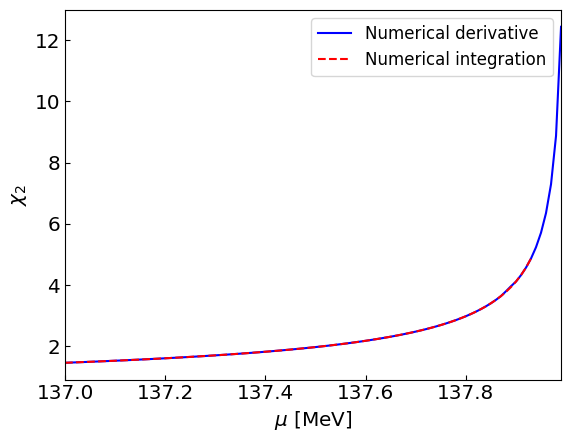

In [9]:
# Plot the results
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

plt.plot(mus, chi2sNder, label = "Numerical derivative", linestyle = '-', color = 'blue')
plt.plot(mus, chi2sNint, label = "Numerical integration", linestyle = '--', color = 'red')

plt.xlabel("${\mu}$ [MeV]")
plt.ylabel("${\\chi_2}$")
plt.xlim(mus[0],mus[-1])

plt.legend()

plt.show()

## BONUS: Using automatic differentiation

In [10]:
import mygrad as mg

def dfdx_mygrad(func, x):
    xx = mg.Tensor(x)
    y = func(xx)
    y.backward()
    return xx.grad

from mygrad import exp, sqrt

def fThermalMG(x):
    return d * x**2 / (2 * np.pi**2) / (exp(sqrt((m/T)**2 + x**2) - muAD/T) + eta)

def chi2AD(inT, inMu, Nrect):
    global T, mu
    T = inT
    mu = inMu

    def fAD(x):
        global muAD
        muAD = x
        def fInt(t):
          return g(t, fThermalMG, 0)
        return rectangle_rule(fInt, 0., 1., Nrect)
    
    return T * dfdx_mygrad(fAD, mu)

/var/folders/3v/f0ynmrq5313979_z9dzqpvr00000gp/T/ipykernel_7883/1464880764.py:6: RuntimeWarning: overflow encountered in scalar power
  return d / (2. * np.pi**2) * k**2 * np.exp(np.sqrt((m/T)**2+k**2)-mu/T) / (np.exp(np.sqrt((m/T)**2+k**2)-mu/T) + eta)**2


Failed to achieve the desired accuracy after 10 iterations
Failed to achieve the desired accuracy after 10 iterations
Failed to achieve the desired accuracy after 10 iterations
Failed to achieve the desired accuracy after 10 iterations
Failed to achieve the desired accuracy after 10 iterations
Failed to achieve the desired accuracy after 10 iterations


/var/folders/3v/f0ynmrq5313979_z9dzqpvr00000gp/T/ipykernel_7883/1464880764.py:6: RuntimeWarning: overflow encountered in exp
  return d / (2. * np.pi**2) * k**2 * np.exp(np.sqrt((m/T)**2+k**2)-mu/T) / (np.exp(np.sqrt((m/T)**2+k**2)-mu/T) + eta)**2
/var/folders/3v/f0ynmrq5313979_z9dzqpvr00000gp/T/ipykernel_7883/1464880764.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return d / (2. * np.pi**2) * k**2 * np.exp(np.sqrt((m/T)**2+k**2)-mu/T) / (np.exp(np.sqrt((m/T)**2+k**2)-mu/T) + eta)**2


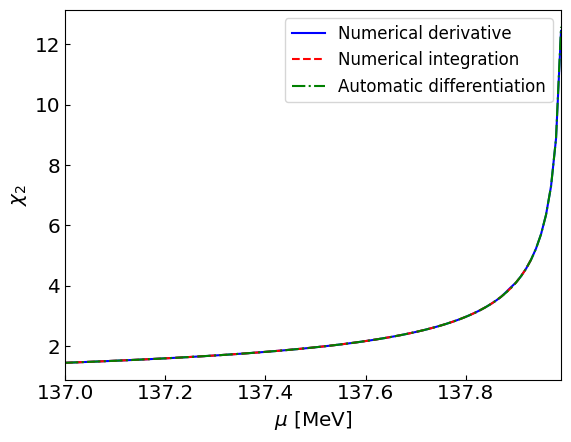

In [11]:
mus = np.arange(0., 138., 1.)
mus = np.arange(137., 138., 0.01)
# print(mus)
chi2sNder = []
chi2sNint = []
chi2sAD = []

dmu = 0.0001
Nrect = 100

for mu in mus:
    chi2sNder.append(chinumder(T, mu, dmu, eps))
    # chi2sNder.append(chinumderNrect(T, mu, dmu, Nrect))
    chi2sNint.append(chiIntegral(T, mu, eps))
    chi2sAD.append(chi2AD(T, mu, Nrect))

plt.plot(mus, chi2sNder, label = "Numerical derivative", linestyle = '-', color = 'blue')
plt.plot(mus, chi2sNint, label = "Numerical integration", linestyle = '--', color = 'red')
plt.plot(mus, chi2sAD, label = "Automatic differentiation", linestyle = '-.', color = 'green')

plt.xlabel("${\mu}$ [MeV]")
plt.ylabel("${\\chi_2}$")
plt.xlim(mus[0],mus[-1])

plt.legend()

plt.show()